In [1]:
# Importing Libraries

In [11]:
import pandas as pd
import numpy as np

In [12]:
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

In [13]:
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6142,0.277013,-0.017327,-0.108184,-0.988186,-0.98857,-0.99031,-0.988547,-0.987859,-0.990558,-0.933673,...,0.063378,-0.817828,0.155249,-0.121316,0.633324,-0.29935,-0.71443,27,6,LAYING


In [14]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1894,0.276425,-0.018626,-0.106165,-0.996926,-0.985498,-0.990213,-0.997407,-0.98491,-0.990259,-0.940472,...,0.211316,0.179502,-0.653772,0.003994,-0.521574,-0.181325,-0.161829,18,4,SITTING


### Correlation between Feature

In [10]:
x=train.corr()

In [17]:
s=x.unstack()

In [22]:
so=s.sort_values(kind='quicksort',ascending=False)

In [39]:
# top 20 correlated values
g=pd.DataFrame(so,columns=['a'])
g.loc[g['a']!=1].head(20)

,,a
fBodyAccJerk-energy()-Z,tBodyAccJerk-energy()-Z,1.000000
tBodyAccJerk-energy()-Z,fBodyAccJerk-energy()-Z,1.000000
tBodyAccJerk-energy()-Y,fBodyAccJerk-energy()-Y,1.000000
fBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Y,1.000000
fBodyAccJerk-energy()-X,tBodyAccJerk-energy()-X,0.999999
tBodyAccJerk-energy()-X,fBodyAccJerk-energy()-X,0.999999
fBodyAcc-energy()-X,"fBodyAcc-bandsEnergy()-1,24",0.999878
"fBodyAcc-bandsEnergy()-1,24",fBodyAcc-energy()-X,0.999878
"fBodyGyro-bandsEnergy()-1,24",fBodyGyro-energy()-X,0.999767
fBodyGyro-energy()-X,"fBodyGyro-bandsEnergy()-1,24",0.999767


### Count of Acceleration and gyroscope features

In [76]:
mydict={}
g=set([col.split('-')[0] for col in train.columns])
mydict={key: 0 for key in g}
for i in [col.split('-')[0] for col in train.columns]:
    if i in mydict.keys():
        mydict[i]+=1
from collections import Counter 
count=Counter(mydict).most_common(10)


In [77]:
pd.DataFrame(count,columns=['Feature','Count'])

,Feature,Count
0,fBodyAccJerk,79
1,fBodyAcc,79
2,fBodyGyro,79
3,tBodyGyro,40
4,tBodyAcc,40
5,tGravityAcc,40
6,tBodyAccJerk,40
7,tBodyGyroJerk,40
8,tBodyGyroMag,13
9,fBodyBodyGyroMag,13


There are many Acceleration and gyroscope features and few gravity features

### Description

In [44]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [45]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [15]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [16]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [17]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [18]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [19]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [20]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [21]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [22]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [23]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [24]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [25]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [26]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [27]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM

#### Model 1: 64 hidden layers

In [88]:
# Initiliazing the sequential model
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
model = Sequential()
# Configuring the parameters
model.add(LSTM(64, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                18944     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [90]:
# Training the model
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30


3408/7352 [============>.................] - ETA: 7:47 - loss: 1.7549 - acc: 0.250 - ETA: 4:08 - loss: 1.7856 - acc: 0.187 - ETA: 2:56 - loss: 1.7912 - acc: 0.125 - ETA: 2:19 - loss: 1.7848 - acc: 0.171 - ETA: 1:58 - loss: 1.7793 - acc: 0.162 - ETA: 1:43 - loss: 1.7819 - acc: 0.166 - ETA: 1:33 - loss: 1.7769 - acc: 0.169 - ETA: 1:25 - loss: 1.7745 - acc: 0.164 - ETA: 1:19 - loss: 1.7676 - acc: 0.180 - ETA: 1:14 - loss: 1.7669 - acc: 0.162 - ETA: 1:10 - loss: 1.7622 - acc: 0.187 - ETA: 1:07 - loss: 1.7600 - acc: 0.177 - ETA: 1:04 - loss: 1.7549 - acc: 0.187 - ETA: 1:02 - loss: 1.7514 - acc: 0.196 - ETA: 59s - loss: 1.7509 - acc: 0.195 - ETA: 58s - loss: 1.7445 - acc: 0.20 - ETA: 56s - loss: 1.7367 - acc: 0.21 - ETA: 54s - loss: 1.7299 - acc: 0.21 - ETA: 53s - loss: 1.7185 - acc: 0.23 - ETA: 52s - loss: 1.7103 - acc: 0.24 - ETA: 51s - loss: 1.7049 - acc: 0.25 - ETA: 50s - loss: 1.6942 - acc: 0.26 - ETA: 49s - loss: 1.6828 - acc: 0.27 - ETA: 48s - loss: 1.6785 - acc: 0.27 - ETA: 47s - los

3440/7352 [=============>................] - ETA: 29s - loss: 1.0312 - acc: 0.37 - ETA: 30s - loss: 0.9927 - acc: 0.43 - ETA: 30s - loss: 0.8814 - acc: 0.52 - ETA: 29s - loss: 0.8411 - acc: 0.59 - ETA: 29s - loss: 0.8204 - acc: 0.61 - ETA: 30s - loss: 0.7913 - acc: 0.64 - ETA: 30s - loss: 0.8836 - acc: 0.63 - ETA: 29s - loss: 0.8642 - acc: 0.61 - ETA: 29s - loss: 0.8604 - acc: 0.63 - ETA: 29s - loss: 0.8383 - acc: 0.64 - ETA: 29s - loss: 0.8291 - acc: 0.64 - ETA: 29s - loss: 0.8810 - acc: 0.63 - ETA: 29s - loss: 0.8965 - acc: 0.62 - ETA: 29s - loss: 0.8960 - acc: 0.62 - ETA: 29s - loss: 0.9052 - acc: 0.62 - ETA: 29s - loss: 0.9011 - acc: 0.62 - ETA: 29s - loss: 0.9001 - acc: 0.61 - ETA: 29s - loss: 0.8939 - acc: 0.61 - ETA: 29s - loss: 0.8853 - acc: 0.62 - ETA: 29s - loss: 0.8860 - acc: 0.61 - ETA: 29s - loss: 0.9115 - acc: 0.60 - ETA: 29s - loss: 0.9400 - acc: 0.59 - ETA: 29s - loss: 0.9458 - acc: 0.58 - ETA: 29s - loss: 0.9416 - acc: 0.59 - ETA: 28s - loss: 0.9348 - acc: 0.59 - ETA: 

7352/7352 [==============================] - ETA: 1s - loss: 0.8889 - acc: 0.589 - ETA: 1s - loss: 0.8882 - acc: 0.589 - ETA: 1s - loss: 0.8880 - acc: 0.589 - ETA: 1s - loss: 0.8879 - acc: 0.590 - ETA: 1s - loss: 0.8879 - acc: 0.590 - ETA: 1s - loss: 0.8877 - acc: 0.590 - ETA: 1s - loss: 0.8883 - acc: 0.590 - ETA: 1s - loss: 0.8886 - acc: 0.589 - ETA: 1s - loss: 0.8880 - acc: 0.589 - ETA: 1s - loss: 0.8875 - acc: 0.590 - ETA: 1s - loss: 0.8876 - acc: 0.589 - ETA: 1s - loss: 0.8872 - acc: 0.589 - ETA: 1s - loss: 0.8870 - acc: 0.589 - ETA: 1s - loss: 0.8873 - acc: 0.589 - ETA: 0s - loss: 0.8868 - acc: 0.590 - ETA: 0s - loss: 0.8863 - acc: 0.590 - ETA: 0s - loss: 0.8860 - acc: 0.590 - ETA: 0s - loss: 0.8854 - acc: 0.590 - ETA: 0s - loss: 0.8845 - acc: 0.591 - ETA: 0s - loss: 0.8845 - acc: 0.591 - ETA: 0s - loss: 0.8840 - acc: 0.591 - ETA: 0s - loss: 0.8839 - acc: 0.591 - ETA: 0s - loss: 0.8835 - acc: 0.592 - ETA: 0s - loss: 0.8832 - acc: 0.592 - ETA: 0s - loss: 0.8829 - acc: 0.592 - ETA: 

3440/7352 [=============>................] - ETA: 33s - loss: 0.5445 - acc: 0.81 - ETA: 34s - loss: 0.8037 - acc: 0.62 - ETA: 34s - loss: 0.7492 - acc: 0.66 - ETA: 34s - loss: 0.7273 - acc: 0.67 - ETA: 33s - loss: 0.7105 - acc: 0.70 - ETA: 33s - loss: 0.7275 - acc: 0.69 - ETA: 32s - loss: 0.7127 - acc: 0.68 - ETA: 32s - loss: 0.7310 - acc: 0.68 - ETA: 32s - loss: 0.7233 - acc: 0.69 - ETA: 32s - loss: 0.7129 - acc: 0.68 - ETA: 31s - loss: 0.7180 - acc: 0.68 - ETA: 31s - loss: 0.7069 - acc: 0.67 - ETA: 31s - loss: 0.7088 - acc: 0.66 - ETA: 31s - loss: 0.7071 - acc: 0.65 - ETA: 30s - loss: 0.7035 - acc: 0.64 - ETA: 30s - loss: 0.7015 - acc: 0.64 - ETA: 30s - loss: 0.7231 - acc: 0.63 - ETA: 30s - loss: 0.7560 - acc: 0.63 - ETA: 30s - loss: 0.7661 - acc: 0.62 - ETA: 30s - loss: 0.7484 - acc: 0.64 - ETA: 30s - loss: 0.7539 - acc: 0.63 - ETA: 30s - loss: 0.7604 - acc: 0.63 - ETA: 30s - loss: 0.7816 - acc: 0.62 - ETA: 30s - loss: 0.8157 - acc: 0.61 - ETA: 29s - loss: 0.8193 - acc: 0.60 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.6001 - acc: 0.93 - ETA: 32s - loss: 0.6813 - acc: 0.81 - ETA: 34s - loss: 0.6414 - acc: 0.77 - ETA: 34s - loss: 0.7004 - acc: 0.68 - ETA: 35s - loss: 0.7203 - acc: 0.68 - ETA: 35s - loss: 0.7105 - acc: 0.67 - ETA: 35s - loss: 0.8006 - acc: 0.66 - ETA: 35s - loss: 0.7985 - acc: 0.65 - ETA: 35s - loss: 0.8695 - acc: 0.62 - ETA: 34s - loss: 0.8513 - acc: 0.61 - ETA: 34s - loss: 0.8743 - acc: 0.61 - ETA: 34s - loss: 0.9136 - acc: 0.61 - ETA: 34s - loss: 0.8986 - acc: 0.61 - ETA: 34s - loss: 0.8784 - acc: 0.62 - ETA: 34s - loss: 0.8738 - acc: 0.62 - ETA: 34s - loss: 0.8584 - acc: 0.62 - ETA: 34s - loss: 0.8354 - acc: 0.63 - ETA: 34s - loss: 0.8235 - acc: 0.64 - ETA: 33s - loss: 0.8448 - acc: 0.63 - ETA: 33s - loss: 0.8527 - acc: 0.62 - ETA: 33s - loss: 0.8509 - acc: 0.63 - ETA: 33s - loss: 0.8418 - acc: 0.63 - ETA: 33s - loss: 0.8287 - acc: 0.63 - ETA: 33s - loss: 0.8336 - acc: 0.63 - ETA: 32s - loss: 0.8418 - acc: 0.62 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.6506 - acc: 0.701 - ETA: 1s - loss: 0.6502 - acc: 0.701 - ETA: 1s - loss: 0.6499 - acc: 0.701 - ETA: 1s - loss: 0.6492 - acc: 0.701 - ETA: 1s - loss: 0.6503 - acc: 0.701 - ETA: 1s - loss: 0.6497 - acc: 0.702 - ETA: 1s - loss: 0.6493 - acc: 0.702 - ETA: 1s - loss: 0.6494 - acc: 0.702 - ETA: 1s - loss: 0.6490 - acc: 0.702 - ETA: 1s - loss: 0.6491 - acc: 0.702 - ETA: 1s - loss: 0.6495 - acc: 0.702 - ETA: 1s - loss: 0.6491 - acc: 0.702 - ETA: 1s - loss: 0.6491 - acc: 0.702 - ETA: 1s - loss: 0.6491 - acc: 0.702 - ETA: 1s - loss: 0.6498 - acc: 0.702 - ETA: 0s - loss: 0.6502 - acc: 0.702 - ETA: 0s - loss: 0.6499 - acc: 0.702 - ETA: 0s - loss: 0.6498 - acc: 0.702 - ETA: 0s - loss: 0.6497 - acc: 0.703 - ETA: 0s - loss: 0.6499 - acc: 0.703 - ETA: 0s - loss: 0.6492 - acc: 0.703 - ETA: 0s - loss: 0.6492 - acc: 0.703 - ETA: 0s - loss: 0.6492 - acc: 0.703 - ETA: 0s - loss: 0.6489 - acc: 0.703 - ETA: 0s - loss: 0.6491 - acc: 0.703 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.8302 - acc: 0.68 - ETA: 32s - loss: 0.6811 - acc: 0.68 - ETA: 31s - loss: 0.6530 - acc: 0.68 - ETA: 31s - loss: 0.6957 - acc: 0.67 - ETA: 31s - loss: 0.6573 - acc: 0.67 - ETA: 31s - loss: 0.6245 - acc: 0.71 - ETA: 31s - loss: 0.6104 - acc: 0.73 - ETA: 31s - loss: 0.6189 - acc: 0.73 - ETA: 31s - loss: 0.6104 - acc: 0.72 - ETA: 30s - loss: 0.6499 - acc: 0.73 - ETA: 30s - loss: 0.6404 - acc: 0.72 - ETA: 30s - loss: 0.6827 - acc: 0.72 - ETA: 30s - loss: 0.6690 - acc: 0.72 - ETA: 30s - loss: 0.6697 - acc: 0.72 - ETA: 30s - loss: 0.6506 - acc: 0.73 - ETA: 30s - loss: 0.6354 - acc: 0.73 - ETA: 30s - loss: 0.6356 - acc: 0.73 - ETA: 30s - loss: 0.6285 - acc: 0.74 - ETA: 30s - loss: 0.6099 - acc: 0.75 - ETA: 30s - loss: 0.6076 - acc: 0.75 - ETA: 30s - loss: 0.5999 - acc: 0.75 - ETA: 29s - loss: 0.5924 - acc: 0.75 - ETA: 29s - loss: 0.6020 - acc: 0.74 - ETA: 29s - loss: 0.6000 - acc: 0.74 - ETA: 29s - loss: 0.5996 - acc: 0.74 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.3064 - acc: 0.81 - ETA: 31s - loss: 0.3585 - acc: 0.87 - ETA: 31s - loss: 0.4639 - acc: 0.85 - ETA: 31s - loss: 0.4614 - acc: 0.85 - ETA: 31s - loss: 0.4556 - acc: 0.85 - ETA: 31s - loss: 0.4309 - acc: 0.86 - ETA: 31s - loss: 0.4794 - acc: 0.83 - ETA: 30s - loss: 0.4645 - acc: 0.83 - ETA: 30s - loss: 0.4473 - acc: 0.84 - ETA: 30s - loss: 0.4352 - acc: 0.85 - ETA: 30s - loss: 0.4502 - acc: 0.84 - ETA: 30s - loss: 0.4343 - acc: 0.84 - ETA: 30s - loss: 0.4206 - acc: 0.85 - ETA: 30s - loss: 0.4375 - acc: 0.84 - ETA: 30s - loss: 0.4368 - acc: 0.84 - ETA: 30s - loss: 0.4277 - acc: 0.83 - ETA: 30s - loss: 0.4161 - acc: 0.84 - ETA: 30s - loss: 0.4248 - acc: 0.84 - ETA: 30s - loss: 0.4212 - acc: 0.84 - ETA: 30s - loss: 0.4195 - acc: 0.84 - ETA: 29s - loss: 0.4165 - acc: 0.84 - ETA: 29s - loss: 0.4091 - acc: 0.84 - ETA: 29s - loss: 0.3991 - acc: 0.85 - ETA: 29s - loss: 0.4018 - acc: 0.85 - ETA: 29s - loss: 0.4038 - acc: 0.85 - ETA: 

7352/7352 [==============================] - ETA: 1s - loss: 0.4427 - acc: 0.850 - ETA: 1s - loss: 0.4434 - acc: 0.849 - ETA: 1s - loss: 0.4443 - acc: 0.849 - ETA: 1s - loss: 0.4444 - acc: 0.849 - ETA: 1s - loss: 0.4447 - acc: 0.849 - ETA: 1s - loss: 0.4450 - acc: 0.849 - ETA: 1s - loss: 0.4451 - acc: 0.849 - ETA: 1s - loss: 0.4453 - acc: 0.849 - ETA: 1s - loss: 0.4451 - acc: 0.848 - ETA: 1s - loss: 0.4450 - acc: 0.848 - ETA: 1s - loss: 0.4446 - acc: 0.848 - ETA: 1s - loss: 0.4447 - acc: 0.848 - ETA: 1s - loss: 0.4439 - acc: 0.849 - ETA: 1s - loss: 0.4436 - acc: 0.849 - ETA: 0s - loss: 0.4433 - acc: 0.849 - ETA: 0s - loss: 0.4429 - acc: 0.849 - ETA: 0s - loss: 0.4429 - acc: 0.849 - ETA: 0s - loss: 0.4425 - acc: 0.849 - ETA: 0s - loss: 0.4420 - acc: 0.849 - ETA: 0s - loss: 0.4439 - acc: 0.849 - ETA: 0s - loss: 0.4438 - acc: 0.849 - ETA: 0s - loss: 0.4435 - acc: 0.849 - ETA: 0s - loss: 0.4433 - acc: 0.849 - ETA: 0s - loss: 0.4429 - acc: 0.849 - ETA: 0s - loss: 0.4427 - acc: 0.849 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.3356 - acc: 0.87 - ETA: 31s - loss: 0.3782 - acc: 0.90 - ETA: 31s - loss: 0.3680 - acc: 0.89 - ETA: 31s - loss: 0.3171 - acc: 0.90 - ETA: 31s - loss: 0.2902 - acc: 0.92 - ETA: 31s - loss: 0.3318 - acc: 0.92 - ETA: 31s - loss: 0.3754 - acc: 0.91 - ETA: 30s - loss: 0.3758 - acc: 0.90 - ETA: 30s - loss: 0.3508 - acc: 0.91 - ETA: 30s - loss: 0.3721 - acc: 0.91 - ETA: 30s - loss: 0.3497 - acc: 0.91 - ETA: 30s - loss: 0.3465 - acc: 0.91 - ETA: 30s - loss: 0.3413 - acc: 0.91 - ETA: 30s - loss: 0.3481 - acc: 0.90 - ETA: 30s - loss: 0.3374 - acc: 0.90 - ETA: 30s - loss: 0.3240 - acc: 0.91 - ETA: 30s - loss: 0.3112 - acc: 0.91 - ETA: 31s - loss: 0.3231 - acc: 0.91 - ETA: 31s - loss: 0.3414 - acc: 0.90 - ETA: 31s - loss: 0.3439 - acc: 0.90 - ETA: 31s - loss: 0.3357 - acc: 0.90 - ETA: 31s - loss: 0.3253 - acc: 0.90 - ETA: 31s - loss: 0.3182 - acc: 0.91 - ETA: 31s - loss: 0.3330 - acc: 0.90 - ETA: 31s - loss: 0.3353 - acc: 0.90 - ETA: 

3440/7352 [=============>................] - ETA: 29s - loss: 0.1509 - acc: 1.00 - ETA: 31s - loss: 0.3069 - acc: 0.90 - ETA: 33s - loss: 0.4475 - acc: 0.85 - ETA: 33s - loss: 0.4511 - acc: 0.85 - ETA: 33s - loss: 0.4573 - acc: 0.86 - ETA: 32s - loss: 0.3978 - acc: 0.87 - ETA: 32s - loss: 0.3683 - acc: 0.88 - ETA: 31s - loss: 0.3554 - acc: 0.89 - ETA: 31s - loss: 0.3470 - acc: 0.89 - ETA: 31s - loss: 0.3288 - acc: 0.90 - ETA: 31s - loss: 0.3289 - acc: 0.89 - ETA: 31s - loss: 0.3118 - acc: 0.90 - ETA: 31s - loss: 0.2986 - acc: 0.90 - ETA: 31s - loss: 0.2948 - acc: 0.90 - ETA: 31s - loss: 0.2924 - acc: 0.90 - ETA: 30s - loss: 0.2881 - acc: 0.90 - ETA: 30s - loss: 0.2776 - acc: 0.90 - ETA: 31s - loss: 0.2662 - acc: 0.90 - ETA: 31s - loss: 0.2634 - acc: 0.90 - ETA: 31s - loss: 0.2588 - acc: 0.90 - ETA: 31s - loss: 0.2611 - acc: 0.90 - ETA: 30s - loss: 0.2569 - acc: 0.90 - ETA: 30s - loss: 0.2699 - acc: 0.89 - ETA: 30s - loss: 0.2655 - acc: 0.90 - ETA: 30s - loss: 0.2579 - acc: 0.90 - ETA: 

7352/7352 [==============================] - ETA: 1s - loss: 0.2520 - acc: 0.911 - ETA: 1s - loss: 0.2517 - acc: 0.911 - ETA: 1s - loss: 0.2512 - acc: 0.911 - ETA: 1s - loss: 0.2511 - acc: 0.911 - ETA: 1s - loss: 0.2507 - acc: 0.911 - ETA: 1s - loss: 0.2503 - acc: 0.911 - ETA: 1s - loss: 0.2499 - acc: 0.911 - ETA: 1s - loss: 0.2497 - acc: 0.912 - ETA: 1s - loss: 0.2493 - acc: 0.912 - ETA: 1s - loss: 0.2491 - acc: 0.912 - ETA: 1s - loss: 0.2499 - acc: 0.912 - ETA: 1s - loss: 0.2500 - acc: 0.912 - ETA: 1s - loss: 0.2510 - acc: 0.911 - ETA: 1s - loss: 0.2508 - acc: 0.911 - ETA: 0s - loss: 0.2510 - acc: 0.911 - ETA: 0s - loss: 0.2509 - acc: 0.911 - ETA: 0s - loss: 0.2507 - acc: 0.911 - ETA: 0s - loss: 0.2505 - acc: 0.912 - ETA: 0s - loss: 0.2507 - acc: 0.911 - ETA: 0s - loss: 0.2515 - acc: 0.911 - ETA: 0s - loss: 0.2511 - acc: 0.912 - ETA: 0s - loss: 0.2516 - acc: 0.912 - ETA: 0s - loss: 0.2513 - acc: 0.912 - ETA: 0s - loss: 0.2514 - acc: 0.911 - ETA: 0s - loss: 0.2516 - acc: 0.911 - ETA: 

3440/7352 [=============>................] - ETA: 29s - loss: 0.1559 - acc: 0.93 - ETA: 30s - loss: 0.1282 - acc: 0.96 - ETA: 29s - loss: 0.1754 - acc: 0.93 - ETA: 29s - loss: 0.2361 - acc: 0.89 - ETA: 29s - loss: 0.2500 - acc: 0.87 - ETA: 29s - loss: 0.2324 - acc: 0.88 - ETA: 29s - loss: 0.2074 - acc: 0.90 - ETA: 30s - loss: 0.2199 - acc: 0.90 - ETA: 29s - loss: 0.2344 - acc: 0.89 - ETA: 29s - loss: 0.2265 - acc: 0.90 - ETA: 29s - loss: 0.2486 - acc: 0.89 - ETA: 29s - loss: 0.3215 - acc: 0.89 - ETA: 29s - loss: 0.3345 - acc: 0.87 - ETA: 29s - loss: 0.3326 - acc: 0.87 - ETA: 29s - loss: 0.3196 - acc: 0.88 - ETA: 29s - loss: 0.3173 - acc: 0.88 - ETA: 28s - loss: 0.3082 - acc: 0.88 - ETA: 28s - loss: 0.2947 - acc: 0.89 - ETA: 28s - loss: 0.2916 - acc: 0.89 - ETA: 28s - loss: 0.2834 - acc: 0.89 - ETA: 29s - loss: 0.2817 - acc: 0.89 - ETA: 29s - loss: 0.2725 - acc: 0.90 - ETA: 29s - loss: 0.2689 - acc: 0.90 - ETA: 28s - loss: 0.2814 - acc: 0.90 - ETA: 29s - loss: 0.2724 - acc: 0.90 - ETA: 

3440/7352 [=============>................] - ETA: 28s - loss: 0.2665 - acc: 0.93 - ETA: 29s - loss: 0.1982 - acc: 0.93 - ETA: 29s - loss: 0.2237 - acc: 0.93 - ETA: 29s - loss: 0.1919 - acc: 0.93 - ETA: 29s - loss: 0.1652 - acc: 0.95 - ETA: 29s - loss: 0.1703 - acc: 0.94 - ETA: 29s - loss: 0.1563 - acc: 0.95 - ETA: 29s - loss: 0.1572 - acc: 0.94 - ETA: 30s - loss: 0.1492 - acc: 0.95 - ETA: 30s - loss: 0.1622 - acc: 0.95 - ETA: 30s - loss: 0.1574 - acc: 0.94 - ETA: 30s - loss: 0.1676 - acc: 0.93 - ETA: 30s - loss: 0.2077 - acc: 0.92 - ETA: 30s - loss: 0.2233 - acc: 0.91 - ETA: 30s - loss: 0.2136 - acc: 0.92 - ETA: 29s - loss: 0.2081 - acc: 0.92 - ETA: 29s - loss: 0.2077 - acc: 0.92 - ETA: 30s - loss: 0.2033 - acc: 0.93 - ETA: 30s - loss: 0.2005 - acc: 0.93 - ETA: 30s - loss: 0.1951 - acc: 0.93 - ETA: 30s - loss: 0.2060 - acc: 0.92 - ETA: 30s - loss: 0.2077 - acc: 0.92 - ETA: 29s - loss: 0.2068 - acc: 0.92 - ETA: 29s - loss: 0.2024 - acc: 0.92 - ETA: 29s - loss: 0.1977 - acc: 0.92 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.2081 - acc: 0.928 - ETA: 2s - loss: 0.2079 - acc: 0.928 - ETA: 1s - loss: 0.2079 - acc: 0.928 - ETA: 1s - loss: 0.2076 - acc: 0.928 - ETA: 1s - loss: 0.2081 - acc: 0.928 - ETA: 1s - loss: 0.2077 - acc: 0.928 - ETA: 1s - loss: 0.2074 - acc: 0.928 - ETA: 1s - loss: 0.2071 - acc: 0.928 - ETA: 1s - loss: 0.2069 - acc: 0.928 - ETA: 1s - loss: 0.2066 - acc: 0.929 - ETA: 1s - loss: 0.2067 - acc: 0.928 - ETA: 1s - loss: 0.2063 - acc: 0.929 - ETA: 1s - loss: 0.2072 - acc: 0.928 - ETA: 1s - loss: 0.2069 - acc: 0.928 - ETA: 1s - loss: 0.2072 - acc: 0.928 - ETA: 0s - loss: 0.2068 - acc: 0.929 - ETA: 0s - loss: 0.2064 - acc: 0.929 - ETA: 0s - loss: 0.2061 - acc: 0.929 - ETA: 0s - loss: 0.2059 - acc: 0.929 - ETA: 0s - loss: 0.2057 - acc: 0.929 - ETA: 0s - loss: 0.2058 - acc: 0.929 - ETA: 0s - loss: 0.2063 - acc: 0.929 - ETA: 0s - loss: 0.2067 - acc: 0.929 - ETA: 0s - loss: 0.2069 - acc: 0.929 - ETA: 0s - loss: 0.2066 - acc: 0.929 - ETA: 

3440/7352 [=============>................] - ETA: 28s - loss: 0.3164 - acc: 0.93 - ETA: 29s - loss: 0.2913 - acc: 0.90 - ETA: 29s - loss: 0.2543 - acc: 0.89 - ETA: 29s - loss: 0.2077 - acc: 0.92 - ETA: 29s - loss: 0.1895 - acc: 0.93 - ETA: 29s - loss: 0.1922 - acc: 0.92 - ETA: 29s - loss: 0.1898 - acc: 0.91 - ETA: 29s - loss: 0.1745 - acc: 0.92 - ETA: 30s - loss: 0.1920 - acc: 0.92 - ETA: 30s - loss: 0.1848 - acc: 0.92 - ETA: 30s - loss: 0.2066 - acc: 0.92 - ETA: 30s - loss: 0.2197 - acc: 0.91 - ETA: 30s - loss: 0.2086 - acc: 0.91 - ETA: 30s - loss: 0.1990 - acc: 0.92 - ETA: 30s - loss: 0.1977 - acc: 0.92 - ETA: 29s - loss: 0.1944 - acc: 0.91 - ETA: 29s - loss: 0.1916 - acc: 0.91 - ETA: 29s - loss: 0.1910 - acc: 0.92 - ETA: 29s - loss: 0.1864 - acc: 0.92 - ETA: 29s - loss: 0.1781 - acc: 0.93 - ETA: 29s - loss: 0.1742 - acc: 0.93 - ETA: 29s - loss: 0.1723 - acc: 0.93 - ETA: 29s - loss: 0.1671 - acc: 0.93 - ETA: 29s - loss: 0.1712 - acc: 0.93 - ETA: 29s - loss: 0.1669 - acc: 0.93 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.3355 - acc: 0.93 - ETA: 32s - loss: 0.2066 - acc: 0.93 - ETA: 33s - loss: 0.1845 - acc: 0.93 - ETA: 33s - loss: 0.1810 - acc: 0.93 - ETA: 33s - loss: 0.1507 - acc: 0.95 - ETA: 33s - loss: 0.1365 - acc: 0.95 - ETA: 33s - loss: 0.1462 - acc: 0.94 - ETA: 33s - loss: 0.1470 - acc: 0.94 - ETA: 33s - loss: 0.1329 - acc: 0.95 - ETA: 33s - loss: 0.1291 - acc: 0.95 - ETA: 32s - loss: 0.1265 - acc: 0.95 - ETA: 32s - loss: 0.1244 - acc: 0.95 - ETA: 32s - loss: 0.1329 - acc: 0.95 - ETA: 32s - loss: 0.1563 - acc: 0.94 - ETA: 32s - loss: 0.1512 - acc: 0.94 - ETA: 32s - loss: 0.1781 - acc: 0.93 - ETA: 32s - loss: 0.1763 - acc: 0.93 - ETA: 32s - loss: 0.1691 - acc: 0.93 - ETA: 32s - loss: 0.1659 - acc: 0.93 - ETA: 32s - loss: 0.1665 - acc: 0.93 - ETA: 31s - loss: 0.1632 - acc: 0.93 - ETA: 31s - loss: 0.1567 - acc: 0.94 - ETA: 31s - loss: 0.1621 - acc: 0.93 - ETA: 31s - loss: 0.1587 - acc: 0.94 - ETA: 31s - loss: 0.1776 - acc: 0.93 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.1946 - acc: 0.935 - ETA: 2s - loss: 0.1946 - acc: 0.935 - ETA: 2s - loss: 0.1945 - acc: 0.935 - ETA: 2s - loss: 0.1942 - acc: 0.935 - ETA: 1s - loss: 0.1939 - acc: 0.935 - ETA: 1s - loss: 0.1935 - acc: 0.935 - ETA: 1s - loss: 0.1937 - acc: 0.935 - ETA: 1s - loss: 0.1942 - acc: 0.935 - ETA: 1s - loss: 0.1944 - acc: 0.935 - ETA: 1s - loss: 0.1942 - acc: 0.935 - ETA: 1s - loss: 0.1945 - acc: 0.935 - ETA: 1s - loss: 0.1957 - acc: 0.935 - ETA: 1s - loss: 0.1955 - acc: 0.935 - ETA: 1s - loss: 0.1953 - acc: 0.935 - ETA: 1s - loss: 0.1949 - acc: 0.935 - ETA: 1s - loss: 0.1946 - acc: 0.935 - ETA: 0s - loss: 0.1941 - acc: 0.935 - ETA: 0s - loss: 0.1939 - acc: 0.935 - ETA: 0s - loss: 0.1935 - acc: 0.935 - ETA: 0s - loss: 0.1932 - acc: 0.936 - ETA: 0s - loss: 0.1930 - acc: 0.936 - ETA: 0s - loss: 0.1927 - acc: 0.936 - ETA: 0s - loss: 0.1933 - acc: 0.936 - ETA: 0s - loss: 0.1933 - acc: 0.936 - ETA: 0s - loss: 0.1929 - acc: 0.936 - ETA: 

3440/7352 [=============>................] - ETA: 29s - loss: 0.0741 - acc: 0.93 - ETA: 30s - loss: 0.1051 - acc: 0.93 - ETA: 29s - loss: 0.0948 - acc: 0.95 - ETA: 30s - loss: 0.1353 - acc: 0.93 - ETA: 30s - loss: 0.1215 - acc: 0.93 - ETA: 29s - loss: 0.1068 - acc: 0.94 - ETA: 29s - loss: 0.1417 - acc: 0.93 - ETA: 29s - loss: 0.1423 - acc: 0.93 - ETA: 29s - loss: 0.2048 - acc: 0.93 - ETA: 29s - loss: 0.2251 - acc: 0.90 - ETA: 29s - loss: 0.2163 - acc: 0.90 - ETA: 29s - loss: 0.2159 - acc: 0.90 - ETA: 29s - loss: 0.2215 - acc: 0.90 - ETA: 29s - loss: 0.2107 - acc: 0.91 - ETA: 29s - loss: 0.2082 - acc: 0.91 - ETA: 29s - loss: 0.2011 - acc: 0.91 - ETA: 29s - loss: 0.2081 - acc: 0.90 - ETA: 29s - loss: 0.2086 - acc: 0.90 - ETA: 29s - loss: 0.2408 - acc: 0.90 - ETA: 29s - loss: 0.2541 - acc: 0.89 - ETA: 29s - loss: 0.2476 - acc: 0.89 - ETA: 29s - loss: 0.2471 - acc: 0.89 - ETA: 29s - loss: 0.2460 - acc: 0.89 - ETA: 29s - loss: 0.2421 - acc: 0.89 - ETA: 29s - loss: 0.2384 - acc: 0.89 - ETA: 

3440/7352 [=============>................] - ETA: 29s - loss: 0.1279 - acc: 0.87 - ETA: 29s - loss: 0.3064 - acc: 0.87 - ETA: 29s - loss: 0.3993 - acc: 0.89 - ETA: 29s - loss: 0.4102 - acc: 0.84 - ETA: 30s - loss: 0.3720 - acc: 0.85 - ETA: 30s - loss: 0.3263 - acc: 0.87 - ETA: 30s - loss: 0.3100 - acc: 0.88 - ETA: 29s - loss: 0.2857 - acc: 0.89 - ETA: 29s - loss: 0.2668 - acc: 0.89 - ETA: 29s - loss: 0.2479 - acc: 0.90 - ETA: 29s - loss: 0.2340 - acc: 0.90 - ETA: 29s - loss: 0.2174 - acc: 0.91 - ETA: 29s - loss: 0.2571 - acc: 0.91 - ETA: 29s - loss: 0.2470 - acc: 0.91 - ETA: 29s - loss: 0.2399 - acc: 0.92 - ETA: 29s - loss: 0.2258 - acc: 0.92 - ETA: 29s - loss: 0.2183 - acc: 0.92 - ETA: 29s - loss: 0.2231 - acc: 0.92 - ETA: 29s - loss: 0.2305 - acc: 0.92 - ETA: 29s - loss: 0.2255 - acc: 0.92 - ETA: 29s - loss: 0.2183 - acc: 0.92 - ETA: 29s - loss: 0.2111 - acc: 0.92 - ETA: 29s - loss: 0.2141 - acc: 0.92 - ETA: 29s - loss: 0.2064 - acc: 0.92 - ETA: 29s - loss: 0.2076 - acc: 0.93 - ETA: 

7352/7352 [==============================] - ETA: 1s - loss: 0.1608 - acc: 0.942 - ETA: 1s - loss: 0.1606 - acc: 0.942 - ETA: 1s - loss: 0.1613 - acc: 0.941 - ETA: 1s - loss: 0.1610 - acc: 0.941 - ETA: 1s - loss: 0.1607 - acc: 0.942 - ETA: 1s - loss: 0.1605 - acc: 0.942 - ETA: 1s - loss: 0.1604 - acc: 0.942 - ETA: 1s - loss: 0.1601 - acc: 0.942 - ETA: 1s - loss: 0.1606 - acc: 0.942 - ETA: 1s - loss: 0.1604 - acc: 0.942 - ETA: 1s - loss: 0.1602 - acc: 0.942 - ETA: 1s - loss: 0.1603 - acc: 0.942 - ETA: 1s - loss: 0.1601 - acc: 0.942 - ETA: 1s - loss: 0.1598 - acc: 0.942 - ETA: 1s - loss: 0.1597 - acc: 0.942 - ETA: 0s - loss: 0.1597 - acc: 0.942 - ETA: 0s - loss: 0.1596 - acc: 0.942 - ETA: 0s - loss: 0.1605 - acc: 0.942 - ETA: 0s - loss: 0.1630 - acc: 0.942 - ETA: 0s - loss: 0.1633 - acc: 0.941 - ETA: 0s - loss: 0.1631 - acc: 0.942 - ETA: 0s - loss: 0.1628 - acc: 0.942 - ETA: 0s - loss: 0.1628 - acc: 0.942 - ETA: 0s - loss: 0.1630 - acc: 0.941 - ETA: 0s - loss: 0.1629 - acc: 0.941 - ETA: 

3440/7352 [=============>................] - ETA: 30s - loss: 0.0889 - acc: 1.00 - ETA: 30s - loss: 0.0717 - acc: 1.00 - ETA: 30s - loss: 0.0741 - acc: 0.97 - ETA: 30s - loss: 0.0836 - acc: 0.96 - ETA: 30s - loss: 0.0833 - acc: 0.97 - ETA: 30s - loss: 0.1163 - acc: 0.95 - ETA: 29s - loss: 0.1200 - acc: 0.94 - ETA: 29s - loss: 0.1258 - acc: 0.94 - ETA: 29s - loss: 0.1296 - acc: 0.94 - ETA: 29s - loss: 0.1210 - acc: 0.95 - ETA: 29s - loss: 0.1177 - acc: 0.94 - ETA: 29s - loss: 0.1128 - acc: 0.95 - ETA: 29s - loss: 0.1115 - acc: 0.95 - ETA: 29s - loss: 0.1139 - acc: 0.95 - ETA: 29s - loss: 0.1094 - acc: 0.95 - ETA: 29s - loss: 0.1057 - acc: 0.95 - ETA: 30s - loss: 0.1159 - acc: 0.95 - ETA: 30s - loss: 0.1128 - acc: 0.95 - ETA: 30s - loss: 0.1155 - acc: 0.95 - ETA: 30s - loss: 0.1153 - acc: 0.95 - ETA: 30s - loss: 0.1113 - acc: 0.95 - ETA: 30s - loss: 0.1094 - acc: 0.95 - ETA: 31s - loss: 0.1385 - acc: 0.95 - ETA: 31s - loss: 0.1375 - acc: 0.95 - ETA: 31s - loss: 0.1438 - acc: 0.94 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.1650 - acc: 0.93 - ETA: 31s - loss: 0.1129 - acc: 0.93 - ETA: 31s - loss: 0.1084 - acc: 0.93 - ETA: 31s - loss: 0.1206 - acc: 0.95 - ETA: 31s - loss: 0.1299 - acc: 0.93 - ETA: 31s - loss: 0.1183 - acc: 0.94 - ETA: 30s - loss: 0.1084 - acc: 0.95 - ETA: 30s - loss: 0.1340 - acc: 0.94 - ETA: 30s - loss: 0.1406 - acc: 0.94 - ETA: 30s - loss: 0.1424 - acc: 0.94 - ETA: 30s - loss: 0.1377 - acc: 0.94 - ETA: 30s - loss: 0.1325 - acc: 0.94 - ETA: 30s - loss: 0.1289 - acc: 0.95 - ETA: 30s - loss: 0.1463 - acc: 0.94 - ETA: 29s - loss: 0.1409 - acc: 0.95 - ETA: 29s - loss: 0.1386 - acc: 0.94 - ETA: 29s - loss: 0.1315 - acc: 0.95 - ETA: 29s - loss: 0.1324 - acc: 0.95 - ETA: 29s - loss: 0.1305 - acc: 0.95 - ETA: 29s - loss: 0.1288 - acc: 0.95 - ETA: 29s - loss: 0.1308 - acc: 0.94 - ETA: 29s - loss: 0.1294 - acc: 0.94 - ETA: 29s - loss: 0.1267 - acc: 0.95 - ETA: 29s - loss: 0.1226 - acc: 0.95 - ETA: 29s - loss: 0.1234 - acc: 0.95 - ETA: 

7352/7352 [==============================] - ETA: 1s - loss: 0.1719 - acc: 0.943 - ETA: 1s - loss: 0.1723 - acc: 0.943 - ETA: 1s - loss: 0.1721 - acc: 0.943 - ETA: 1s - loss: 0.1723 - acc: 0.943 - ETA: 1s - loss: 0.1719 - acc: 0.943 - ETA: 1s - loss: 0.1716 - acc: 0.943 - ETA: 1s - loss: 0.1712 - acc: 0.943 - ETA: 1s - loss: 0.1710 - acc: 0.943 - ETA: 1s - loss: 0.1707 - acc: 0.943 - ETA: 1s - loss: 0.1706 - acc: 0.943 - ETA: 1s - loss: 0.1703 - acc: 0.944 - ETA: 1s - loss: 0.1716 - acc: 0.944 - ETA: 1s - loss: 0.1712 - acc: 0.944 - ETA: 1s - loss: 0.1714 - acc: 0.943 - ETA: 1s - loss: 0.1723 - acc: 0.943 - ETA: 0s - loss: 0.1720 - acc: 0.943 - ETA: 0s - loss: 0.1718 - acc: 0.943 - ETA: 0s - loss: 0.1715 - acc: 0.944 - ETA: 0s - loss: 0.1712 - acc: 0.944 - ETA: 0s - loss: 0.1710 - acc: 0.944 - ETA: 0s - loss: 0.1707 - acc: 0.944 - ETA: 0s - loss: 0.1705 - acc: 0.944 - ETA: 0s - loss: 0.1705 - acc: 0.944 - ETA: 0s - loss: 0.1702 - acc: 0.944 - ETA: 0s - loss: 0.1703 - acc: 0.944 - ETA: 

3440/7352 [=============>................] - ETA: 36s - loss: 0.1318 - acc: 0.87 - ETA: 34s - loss: 0.2239 - acc: 0.81 - ETA: 33s - loss: 0.1789 - acc: 0.85 - ETA: 33s - loss: 0.1741 - acc: 0.85 - ETA: 32s - loss: 0.1491 - acc: 0.88 - ETA: 32s - loss: 0.1750 - acc: 0.89 - ETA: 32s - loss: 0.1921 - acc: 0.88 - ETA: 32s - loss: 0.1768 - acc: 0.89 - ETA: 31s - loss: 0.1583 - acc: 0.90 - ETA: 31s - loss: 0.1503 - acc: 0.91 - ETA: 31s - loss: 0.1511 - acc: 0.91 - ETA: 31s - loss: 0.1411 - acc: 0.92 - ETA: 31s - loss: 0.1335 - acc: 0.92 - ETA: 31s - loss: 0.1249 - acc: 0.93 - ETA: 31s - loss: 0.1884 - acc: 0.92 - ETA: 31s - loss: 0.1811 - acc: 0.92 - ETA: 30s - loss: 0.1727 - acc: 0.93 - ETA: 30s - loss: 0.1639 - acc: 0.93 - ETA: 30s - loss: 0.1587 - acc: 0.94 - ETA: 30s - loss: 0.1538 - acc: 0.94 - ETA: 30s - loss: 0.1583 - acc: 0.94 - ETA: 30s - loss: 0.1594 - acc: 0.94 - ETA: 30s - loss: 0.1600 - acc: 0.94 - ETA: 30s - loss: 0.1567 - acc: 0.94 - ETA: 30s - loss: 0.1522 - acc: 0.94 - ETA: 

3440/7352 [=============>................] - ETA: 29s - loss: 0.5613 - acc: 0.87 - ETA: 28s - loss: 0.4599 - acc: 0.87 - ETA: 29s - loss: 0.5380 - acc: 0.89 - ETA: 29s - loss: 0.5026 - acc: 0.90 - ETA: 29s - loss: 0.4240 - acc: 0.91 - ETA: 29s - loss: 0.4277 - acc: 0.89 - ETA: 29s - loss: 0.3740 - acc: 0.90 - ETA: 29s - loss: 0.3408 - acc: 0.90 - ETA: 29s - loss: 0.3096 - acc: 0.91 - ETA: 29s - loss: 0.2849 - acc: 0.91 - ETA: 29s - loss: 0.2622 - acc: 0.92 - ETA: 29s - loss: 0.2567 - acc: 0.92 - ETA: 29s - loss: 0.2531 - acc: 0.92 - ETA: 29s - loss: 0.2546 - acc: 0.91 - ETA: 29s - loss: 0.2444 - acc: 0.92 - ETA: 29s - loss: 0.2307 - acc: 0.92 - ETA: 29s - loss: 0.2185 - acc: 0.93 - ETA: 29s - loss: 0.2097 - acc: 0.93 - ETA: 29s - loss: 0.1993 - acc: 0.93 - ETA: 29s - loss: 0.1896 - acc: 0.93 - ETA: 29s - loss: 0.1810 - acc: 0.94 - ETA: 29s - loss: 0.1785 - acc: 0.94 - ETA: 29s - loss: 0.1739 - acc: 0.94 - ETA: 29s - loss: 0.1687 - acc: 0.94 - ETA: 28s - loss: 0.1777 - acc: 0.94 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.1552 - acc: 0.944 - ETA: 2s - loss: 0.1550 - acc: 0.944 - ETA: 1s - loss: 0.1547 - acc: 0.945 - ETA: 1s - loss: 0.1544 - acc: 0.945 - ETA: 1s - loss: 0.1542 - acc: 0.945 - ETA: 1s - loss: 0.1541 - acc: 0.945 - ETA: 1s - loss: 0.1544 - acc: 0.945 - ETA: 1s - loss: 0.1542 - acc: 0.945 - ETA: 1s - loss: 0.1541 - acc: 0.945 - ETA: 1s - loss: 0.1538 - acc: 0.945 - ETA: 1s - loss: 0.1537 - acc: 0.945 - ETA: 1s - loss: 0.1534 - acc: 0.945 - ETA: 1s - loss: 0.1536 - acc: 0.945 - ETA: 1s - loss: 0.1533 - acc: 0.945 - ETA: 1s - loss: 0.1530 - acc: 0.945 - ETA: 1s - loss: 0.1532 - acc: 0.945 - ETA: 0s - loss: 0.1530 - acc: 0.945 - ETA: 0s - loss: 0.1527 - acc: 0.945 - ETA: 0s - loss: 0.1543 - acc: 0.945 - ETA: 0s - loss: 0.1550 - acc: 0.945 - ETA: 0s - loss: 0.1548 - acc: 0.945 - ETA: 0s - loss: 0.1546 - acc: 0.945 - ETA: 0s - loss: 0.1550 - acc: 0.945 - ETA: 0s - loss: 0.1550 - acc: 0.945 - ETA: 0s - loss: 0.1547 - acc: 0.945 - ETA: 

3440/7352 [=============>................] - ETA: 36s - loss: 0.0800 - acc: 0.93 - ETA: 34s - loss: 0.0683 - acc: 0.93 - ETA: 34s - loss: 0.1382 - acc: 0.89 - ETA: 35s - loss: 0.1289 - acc: 0.92 - ETA: 34s - loss: 0.1196 - acc: 0.93 - ETA: 34s - loss: 0.1024 - acc: 0.94 - ETA: 34s - loss: 0.1051 - acc: 0.94 - ETA: 34s - loss: 0.1023 - acc: 0.94 - ETA: 34s - loss: 0.0992 - acc: 0.95 - ETA: 34s - loss: 0.0995 - acc: 0.94 - ETA: 34s - loss: 0.1088 - acc: 0.93 - ETA: 34s - loss: 0.1005 - acc: 0.94 - ETA: 34s - loss: 0.0993 - acc: 0.94 - ETA: 34s - loss: 0.1044 - acc: 0.94 - ETA: 34s - loss: 0.1036 - acc: 0.94 - ETA: 34s - loss: 0.1072 - acc: 0.94 - ETA: 34s - loss: 0.1021 - acc: 0.94 - ETA: 34s - loss: 0.1031 - acc: 0.94 - ETA: 34s - loss: 0.1002 - acc: 0.95 - ETA: 34s - loss: 0.1010 - acc: 0.94 - ETA: 33s - loss: 0.0989 - acc: 0.94 - ETA: 33s - loss: 0.1120 - acc: 0.94 - ETA: 33s - loss: 0.1089 - acc: 0.94 - ETA: 33s - loss: 0.1242 - acc: 0.94 - ETA: 33s - loss: 0.1199 - acc: 0.94 - ETA: 

3440/7352 [=============>................] - ETA: 30s - loss: 0.2934 - acc: 0.81 - ETA: 29s - loss: 0.2094 - acc: 0.87 - ETA: 29s - loss: 0.2622 - acc: 0.87 - ETA: 29s - loss: 0.2190 - acc: 0.90 - ETA: 29s - loss: 0.2291 - acc: 0.90 - ETA: 29s - loss: 0.1990 - acc: 0.91 - ETA: 29s - loss: 0.1949 - acc: 0.91 - ETA: 29s - loss: 0.1811 - acc: 0.92 - ETA: 29s - loss: 0.1716 - acc: 0.92 - ETA: 29s - loss: 0.1601 - acc: 0.93 - ETA: 29s - loss: 0.1687 - acc: 0.92 - ETA: 29s - loss: 0.1918 - acc: 0.92 - ETA: 29s - loss: 0.1901 - acc: 0.91 - ETA: 29s - loss: 0.1841 - acc: 0.91 - ETA: 28s - loss: 0.1762 - acc: 0.91 - ETA: 28s - loss: 0.1690 - acc: 0.92 - ETA: 28s - loss: 0.1778 - acc: 0.91 - ETA: 28s - loss: 0.1768 - acc: 0.92 - ETA: 28s - loss: 0.1702 - acc: 0.92 - ETA: 28s - loss: 0.1661 - acc: 0.92 - ETA: 28s - loss: 0.1626 - acc: 0.92 - ETA: 28s - loss: 0.1733 - acc: 0.92 - ETA: 28s - loss: 0.1730 - acc: 0.92 - ETA: 28s - loss: 0.1752 - acc: 0.91 - ETA: 28s - loss: 0.1720 - acc: 0.92 - ETA: 

7352/7352 [==============================] - ETA: 1s - loss: 0.1582 - acc: 0.944 - ETA: 1s - loss: 0.1584 - acc: 0.944 - ETA: 1s - loss: 0.1585 - acc: 0.944 - ETA: 1s - loss: 0.1582 - acc: 0.944 - ETA: 1s - loss: 0.1584 - acc: 0.944 - ETA: 1s - loss: 0.1584 - acc: 0.944 - ETA: 1s - loss: 0.1592 - acc: 0.944 - ETA: 1s - loss: 0.1594 - acc: 0.944 - ETA: 1s - loss: 0.1592 - acc: 0.944 - ETA: 1s - loss: 0.1588 - acc: 0.944 - ETA: 1s - loss: 0.1586 - acc: 0.945 - ETA: 1s - loss: 0.1595 - acc: 0.944 - ETA: 1s - loss: 0.1592 - acc: 0.944 - ETA: 1s - loss: 0.1589 - acc: 0.945 - ETA: 0s - loss: 0.1588 - acc: 0.944 - ETA: 0s - loss: 0.1586 - acc: 0.945 - ETA: 0s - loss: 0.1584 - acc: 0.945 - ETA: 0s - loss: 0.1585 - acc: 0.945 - ETA: 0s - loss: 0.1582 - acc: 0.945 - ETA: 0s - loss: 0.1579 - acc: 0.945 - ETA: 0s - loss: 0.1580 - acc: 0.945 - ETA: 0s - loss: 0.1588 - acc: 0.945 - ETA: 0s - loss: 0.1599 - acc: 0.945 - ETA: 0s - loss: 0.1596 - acc: 0.945 - ETA: 0s - loss: 0.1597 - acc: 0.945 - ETA: 

3440/7352 [=============>................] - ETA: 28s - loss: 0.0435 - acc: 1.00 - ETA: 29s - loss: 0.2092 - acc: 0.96 - ETA: 29s - loss: 0.1670 - acc: 0.95 - ETA: 29s - loss: 0.2179 - acc: 0.93 - ETA: 29s - loss: 0.2401 - acc: 0.92 - ETA: 29s - loss: 0.2193 - acc: 0.92 - ETA: 29s - loss: 0.2058 - acc: 0.92 - ETA: 29s - loss: 0.1982 - acc: 0.92 - ETA: 29s - loss: 0.1779 - acc: 0.93 - ETA: 29s - loss: 0.1706 - acc: 0.93 - ETA: 29s - loss: 0.1567 - acc: 0.94 - ETA: 29s - loss: 0.1470 - acc: 0.94 - ETA: 29s - loss: 0.1407 - acc: 0.95 - ETA: 29s - loss: 0.1355 - acc: 0.95 - ETA: 29s - loss: 0.1321 - acc: 0.95 - ETA: 29s - loss: 0.1412 - acc: 0.95 - ETA: 29s - loss: 0.1359 - acc: 0.95 - ETA: 29s - loss: 0.1476 - acc: 0.94 - ETA: 29s - loss: 0.1485 - acc: 0.94 - ETA: 29s - loss: 0.1415 - acc: 0.95 - ETA: 28s - loss: 0.1433 - acc: 0.94 - ETA: 28s - loss: 0.1391 - acc: 0.95 - ETA: 28s - loss: 0.1361 - acc: 0.95 - ETA: 28s - loss: 0.1354 - acc: 0.95 - ETA: 28s - loss: 0.1368 - acc: 0.95 - ETA: 

3440/7352 [=============>................] - ETA: 30s - loss: 0.0450 - acc: 1.00 - ETA: 29s - loss: 0.0570 - acc: 1.00 - ETA: 29s - loss: 0.1290 - acc: 0.95 - ETA: 29s - loss: 0.1144 - acc: 0.96 - ETA: 29s - loss: 0.1484 - acc: 0.96 - ETA: 29s - loss: 0.1849 - acc: 0.95 - ETA: 29s - loss: 0.1788 - acc: 0.94 - ETA: 29s - loss: 0.1676 - acc: 0.94 - ETA: 29s - loss: 0.1540 - acc: 0.95 - ETA: 29s - loss: 0.1540 - acc: 0.95 - ETA: 29s - loss: 0.1475 - acc: 0.95 - ETA: 29s - loss: 0.1375 - acc: 0.95 - ETA: 29s - loss: 0.1326 - acc: 0.96 - ETA: 29s - loss: 0.1383 - acc: 0.95 - ETA: 29s - loss: 0.1366 - acc: 0.95 - ETA: 29s - loss: 0.1366 - acc: 0.94 - ETA: 29s - loss: 0.1549 - acc: 0.94 - ETA: 29s - loss: 0.1493 - acc: 0.94 - ETA: 29s - loss: 0.1448 - acc: 0.94 - ETA: 29s - loss: 0.1500 - acc: 0.94 - ETA: 28s - loss: 0.1453 - acc: 0.94 - ETA: 28s - loss: 0.1404 - acc: 0.95 - ETA: 28s - loss: 0.1348 - acc: 0.95 - ETA: 28s - loss: 0.1333 - acc: 0.95 - ETA: 28s - loss: 0.1296 - acc: 0.95 - ETA: 

7352/7352 [==============================] - ETA: 1s - loss: 0.1362 - acc: 0.947 - ETA: 1s - loss: 0.1360 - acc: 0.947 - ETA: 1s - loss: 0.1357 - acc: 0.947 - ETA: 1s - loss: 0.1355 - acc: 0.948 - ETA: 1s - loss: 0.1352 - acc: 0.948 - ETA: 1s - loss: 0.1353 - acc: 0.948 - ETA: 1s - loss: 0.1352 - acc: 0.948 - ETA: 1s - loss: 0.1353 - acc: 0.948 - ETA: 1s - loss: 0.1355 - acc: 0.948 - ETA: 1s - loss: 0.1353 - acc: 0.948 - ETA: 1s - loss: 0.1350 - acc: 0.948 - ETA: 1s - loss: 0.1352 - acc: 0.948 - ETA: 1s - loss: 0.1349 - acc: 0.948 - ETA: 1s - loss: 0.1350 - acc: 0.948 - ETA: 0s - loss: 0.1350 - acc: 0.948 - ETA: 0s - loss: 0.1351 - acc: 0.947 - ETA: 0s - loss: 0.1351 - acc: 0.947 - ETA: 0s - loss: 0.1350 - acc: 0.947 - ETA: 0s - loss: 0.1356 - acc: 0.947 - ETA: 0s - loss: 0.1355 - acc: 0.947 - ETA: 0s - loss: 0.1353 - acc: 0.948 - ETA: 0s - loss: 0.1353 - acc: 0.948 - ETA: 0s - loss: 0.1353 - acc: 0.948 - ETA: 0s - loss: 0.1352 - acc: 0.947 - ETA: 0s - loss: 0.1353 - acc: 0.947 - ETA: 

3440/7352 [=============>................] - ETA: 29s - loss: 0.2933 - acc: 0.93 - ETA: 29s - loss: 0.1505 - acc: 0.96 - ETA: 29s - loss: 0.1594 - acc: 0.93 - ETA: 29s - loss: 0.2033 - acc: 0.93 - ETA: 29s - loss: 0.1760 - acc: 0.93 - ETA: 29s - loss: 0.1658 - acc: 0.93 - ETA: 29s - loss: 0.1526 - acc: 0.94 - ETA: 29s - loss: 0.1502 - acc: 0.93 - ETA: 29s - loss: 0.1418 - acc: 0.93 - ETA: 29s - loss: 0.1302 - acc: 0.94 - ETA: 29s - loss: 0.1290 - acc: 0.94 - ETA: 29s - loss: 0.1279 - acc: 0.94 - ETA: 29s - loss: 0.1262 - acc: 0.94 - ETA: 29s - loss: 0.1213 - acc: 0.94 - ETA: 29s - loss: 0.1205 - acc: 0.95 - ETA: 29s - loss: 0.1168 - acc: 0.95 - ETA: 29s - loss: 0.1135 - acc: 0.95 - ETA: 28s - loss: 0.1110 - acc: 0.95 - ETA: 28s - loss: 0.1071 - acc: 0.95 - ETA: 28s - loss: 0.1092 - acc: 0.95 - ETA: 28s - loss: 0.1084 - acc: 0.95 - ETA: 28s - loss: 0.1063 - acc: 0.95 - ETA: 28s - loss: 0.1067 - acc: 0.95 - ETA: 28s - loss: 0.1036 - acc: 0.95 - ETA: 28s - loss: 0.1130 - acc: 0.95 - ETA: 

3440/7352 [=============>................] - ETA: 34s - loss: 0.0852 - acc: 0.93 - ETA: 33s - loss: 0.1504 - acc: 0.90 - ETA: 33s - loss: 0.1338 - acc: 0.93 - ETA: 33s - loss: 0.1138 - acc: 0.93 - ETA: 32s - loss: 0.1039 - acc: 0.93 - ETA: 32s - loss: 0.1123 - acc: 0.93 - ETA: 32s - loss: 0.0991 - acc: 0.94 - ETA: 32s - loss: 0.0903 - acc: 0.95 - ETA: 32s - loss: 0.1056 - acc: 0.94 - ETA: 33s - loss: 0.1073 - acc: 0.94 - ETA: 34s - loss: 0.0998 - acc: 0.94 - ETA: 34s - loss: 0.1102 - acc: 0.94 - ETA: 34s - loss: 0.1092 - acc: 0.94 - ETA: 34s - loss: 0.1035 - acc: 0.95 - ETA: 34s - loss: 0.1028 - acc: 0.95 - ETA: 34s - loss: 0.0977 - acc: 0.95 - ETA: 33s - loss: 0.0935 - acc: 0.95 - ETA: 33s - loss: 0.0944 - acc: 0.95 - ETA: 33s - loss: 0.0925 - acc: 0.95 - ETA: 33s - loss: 0.0906 - acc: 0.95 - ETA: 33s - loss: 0.0921 - acc: 0.95 - ETA: 33s - loss: 0.1008 - acc: 0.95 - ETA: 33s - loss: 0.1090 - acc: 0.94 - ETA: 33s - loss: 0.1135 - acc: 0.94 - ETA: 33s - loss: 0.1191 - acc: 0.94 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.1440 - acc: 0.951 - ETA: 2s - loss: 0.1440 - acc: 0.951 - ETA: 1s - loss: 0.1438 - acc: 0.951 - ETA: 1s - loss: 0.1437 - acc: 0.951 - ETA: 1s - loss: 0.1440 - acc: 0.951 - ETA: 1s - loss: 0.1438 - acc: 0.951 - ETA: 1s - loss: 0.1436 - acc: 0.951 - ETA: 1s - loss: 0.1434 - acc: 0.951 - ETA: 1s - loss: 0.1433 - acc: 0.952 - ETA: 1s - loss: 0.1430 - acc: 0.952 - ETA: 1s - loss: 0.1430 - acc: 0.952 - ETA: 1s - loss: 0.1450 - acc: 0.951 - ETA: 1s - loss: 0.1448 - acc: 0.952 - ETA: 1s - loss: 0.1446 - acc: 0.952 - ETA: 1s - loss: 0.1447 - acc: 0.952 - ETA: 0s - loss: 0.1458 - acc: 0.951 - ETA: 0s - loss: 0.1456 - acc: 0.951 - ETA: 0s - loss: 0.1453 - acc: 0.951 - ETA: 0s - loss: 0.1450 - acc: 0.952 - ETA: 0s - loss: 0.1448 - acc: 0.952 - ETA: 0s - loss: 0.1450 - acc: 0.952 - ETA: 0s - loss: 0.1456 - acc: 0.951 - ETA: 0s - loss: 0.1458 - acc: 0.951 - ETA: 0s - loss: 0.1459 - acc: 0.951 - ETA: 0s - loss: 0.1459 - acc: 0.951 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.0434 - acc: 1.00 - ETA: 30s - loss: 0.0593 - acc: 0.96 - ETA: 30s - loss: 0.1371 - acc: 0.95 - ETA: 31s - loss: 0.1392 - acc: 0.95 - ETA: 31s - loss: 0.1200 - acc: 0.96 - ETA: 31s - loss: 0.1029 - acc: 0.96 - ETA: 31s - loss: 0.1244 - acc: 0.96 - ETA: 31s - loss: 0.1489 - acc: 0.95 - ETA: 31s - loss: 0.1366 - acc: 0.95 - ETA: 31s - loss: 0.1336 - acc: 0.95 - ETA: 31s - loss: 0.1316 - acc: 0.95 - ETA: 31s - loss: 0.1517 - acc: 0.95 - ETA: 31s - loss: 0.1431 - acc: 0.95 - ETA: 31s - loss: 0.1398 - acc: 0.95 - ETA: 31s - loss: 0.1354 - acc: 0.95 - ETA: 31s - loss: 0.1277 - acc: 0.96 - ETA: 31s - loss: 0.1666 - acc: 0.95 - ETA: 31s - loss: 0.1627 - acc: 0.95 - ETA: 31s - loss: 0.1631 - acc: 0.95 - ETA: 31s - loss: 0.1617 - acc: 0.95 - ETA: 31s - loss: 0.1560 - acc: 0.95 - ETA: 31s - loss: 0.1552 - acc: 0.95 - ETA: 31s - loss: 0.1529 - acc: 0.95 - ETA: 31s - loss: 0.1516 - acc: 0.95 - ETA: 30s - loss: 0.1483 - acc: 0.95 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.1625 - acc: 0.87 - ETA: 31s - loss: 0.2222 - acc: 0.87 - ETA: 32s - loss: 0.1788 - acc: 0.89 - ETA: 32s - loss: 0.1425 - acc: 0.92 - ETA: 32s - loss: 0.1210 - acc: 0.93 - ETA: 32s - loss: 0.1215 - acc: 0.93 - ETA: 32s - loss: 0.1268 - acc: 0.92 - ETA: 32s - loss: 0.1184 - acc: 0.93 - ETA: 32s - loss: 0.1153 - acc: 0.93 - ETA: 32s - loss: 0.1051 - acc: 0.94 - ETA: 31s - loss: 0.1114 - acc: 0.93 - ETA: 31s - loss: 0.1129 - acc: 0.93 - ETA: 31s - loss: 0.1768 - acc: 0.93 - ETA: 31s - loss: 0.1721 - acc: 0.93 - ETA: 31s - loss: 0.1608 - acc: 0.94 - ETA: 31s - loss: 0.1691 - acc: 0.94 - ETA: 31s - loss: 0.1687 - acc: 0.94 - ETA: 31s - loss: 0.1669 - acc: 0.94 - ETA: 31s - loss: 0.1638 - acc: 0.94 - ETA: 31s - loss: 0.1578 - acc: 0.94 - ETA: 31s - loss: 0.1515 - acc: 0.94 - ETA: 31s - loss: 0.1477 - acc: 0.94 - ETA: 31s - loss: 0.1599 - acc: 0.94 - ETA: 31s - loss: 0.1593 - acc: 0.94 - ETA: 31s - loss: 0.1556 - acc: 0.94 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.1276 - acc: 0.953 - ETA: 2s - loss: 0.1275 - acc: 0.953 - ETA: 1s - loss: 0.1273 - acc: 0.953 - ETA: 1s - loss: 0.1273 - acc: 0.953 - ETA: 1s - loss: 0.1270 - acc: 0.953 - ETA: 1s - loss: 0.1270 - acc: 0.953 - ETA: 1s - loss: 0.1268 - acc: 0.953 - ETA: 1s - loss: 0.1267 - acc: 0.953 - ETA: 1s - loss: 0.1265 - acc: 0.953 - ETA: 1s - loss: 0.1264 - acc: 0.953 - ETA: 1s - loss: 0.1265 - acc: 0.953 - ETA: 1s - loss: 0.1268 - acc: 0.953 - ETA: 1s - loss: 0.1267 - acc: 0.953 - ETA: 1s - loss: 0.1265 - acc: 0.953 - ETA: 1s - loss: 0.1269 - acc: 0.952 - ETA: 0s - loss: 0.1267 - acc: 0.952 - ETA: 0s - loss: 0.1270 - acc: 0.952 - ETA: 0s - loss: 0.1268 - acc: 0.952 - ETA: 0s - loss: 0.1267 - acc: 0.952 - ETA: 0s - loss: 0.1266 - acc: 0.952 - ETA: 0s - loss: 0.1264 - acc: 0.952 - ETA: 0s - loss: 0.1262 - acc: 0.952 - ETA: 0s - loss: 0.1265 - acc: 0.952 - ETA: 0s - loss: 0.1266 - acc: 0.952 - ETA: 0s - loss: 0.1265 - acc: 0.952 - ETA: 

3440/7352 [=============>................] - ETA: 31s - loss: 0.0419 - acc: 1.00 - ETA: 31s - loss: 0.0805 - acc: 0.96 - ETA: 31s - loss: 0.1022 - acc: 0.93 - ETA: 31s - loss: 0.0771 - acc: 0.95 - ETA: 31s - loss: 0.0745 - acc: 0.95 - ETA: 31s - loss: 0.0655 - acc: 0.95 - ETA: 31s - loss: 0.0737 - acc: 0.95 - ETA: 31s - loss: 0.1047 - acc: 0.95 - ETA: 31s - loss: 0.1023 - acc: 0.95 - ETA: 31s - loss: 0.1000 - acc: 0.95 - ETA: 31s - loss: 0.1116 - acc: 0.95 - ETA: 31s - loss: 0.1093 - acc: 0.95 - ETA: 31s - loss: 0.1076 - acc: 0.95 - ETA: 31s - loss: 0.1075 - acc: 0.95 - ETA: 31s - loss: 0.1016 - acc: 0.95 - ETA: 31s - loss: 0.1041 - acc: 0.95 - ETA: 31s - loss: 0.1017 - acc: 0.95 - ETA: 31s - loss: 0.1446 - acc: 0.95 - ETA: 31s - loss: 0.1548 - acc: 0.95 - ETA: 31s - loss: 0.1473 - acc: 0.95 - ETA: 31s - loss: 0.1412 - acc: 0.95 - ETA: 31s - loss: 0.1373 - acc: 0.95 - ETA: 31s - loss: 0.1327 - acc: 0.95 - ETA: 30s - loss: 0.1294 - acc: 0.96 - ETA: 30s - loss: 0.1253 - acc: 0.96 - ETA: 

3440/7352 [=============>................] - ETA: 31s - loss: 0.1203 - acc: 0.93 - ETA: 31s - loss: 0.1254 - acc: 0.90 - ETA: 31s - loss: 0.1261 - acc: 0.89 - ETA: 31s - loss: 0.1303 - acc: 0.90 - ETA: 31s - loss: 0.1432 - acc: 0.91 - ETA: 31s - loss: 0.1305 - acc: 0.92 - ETA: 31s - loss: 0.1199 - acc: 0.93 - ETA: 31s - loss: 0.1216 - acc: 0.93 - ETA: 31s - loss: 0.1087 - acc: 0.94 - ETA: 32s - loss: 0.1028 - acc: 0.95 - ETA: 31s - loss: 0.1109 - acc: 0.95 - ETA: 31s - loss: 0.1123 - acc: 0.95 - ETA: 31s - loss: 0.1096 - acc: 0.95 - ETA: 31s - loss: 0.1048 - acc: 0.95 - ETA: 31s - loss: 0.1047 - acc: 0.95 - ETA: 31s - loss: 0.1055 - acc: 0.95 - ETA: 31s - loss: 0.1025 - acc: 0.95 - ETA: 31s - loss: 0.0979 - acc: 0.95 - ETA: 31s - loss: 0.0982 - acc: 0.95 - ETA: 31s - loss: 0.1061 - acc: 0.95 - ETA: 31s - loss: 0.1052 - acc: 0.95 - ETA: 31s - loss: 0.1122 - acc: 0.94 - ETA: 31s - loss: 0.1087 - acc: 0.94 - ETA: 31s - loss: 0.1068 - acc: 0.95 - ETA: 31s - loss: 0.1046 - acc: 0.95 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.1285 - acc: 0.950 - ETA: 2s - loss: 0.1287 - acc: 0.950 - ETA: 1s - loss: 0.1286 - acc: 0.950 - ETA: 1s - loss: 0.1284 - acc: 0.950 - ETA: 1s - loss: 0.1282 - acc: 0.950 - ETA: 1s - loss: 0.1282 - acc: 0.950 - ETA: 1s - loss: 0.1279 - acc: 0.950 - ETA: 1s - loss: 0.1294 - acc: 0.950 - ETA: 1s - loss: 0.1293 - acc: 0.950 - ETA: 1s - loss: 0.1293 - acc: 0.950 - ETA: 1s - loss: 0.1292 - acc: 0.950 - ETA: 1s - loss: 0.1292 - acc: 0.950 - ETA: 1s - loss: 0.1292 - acc: 0.950 - ETA: 1s - loss: 0.1293 - acc: 0.950 - ETA: 1s - loss: 0.1292 - acc: 0.950 - ETA: 0s - loss: 0.1289 - acc: 0.950 - ETA: 0s - loss: 0.1287 - acc: 0.950 - ETA: 0s - loss: 0.1285 - acc: 0.950 - ETA: 0s - loss: 0.1287 - acc: 0.950 - ETA: 0s - loss: 0.1288 - acc: 0.950 - ETA: 0s - loss: 0.1286 - acc: 0.950 - ETA: 0s - loss: 0.1291 - acc: 0.950 - ETA: 0s - loss: 0.1290 - acc: 0.950 - ETA: 0s - loss: 0.1289 - acc: 0.950 - ETA: 0s - loss: 0.1288 - acc: 0.950 - ETA: 

3440/7352 [=============>................] - ETA: 32s - loss: 0.3680 - acc: 0.87 - ETA: 32s - loss: 0.3036 - acc: 0.90 - ETA: 31s - loss: 0.2594 - acc: 0.89 - ETA: 32s - loss: 0.2014 - acc: 0.92 - ETA: 32s - loss: 0.1767 - acc: 0.93 - ETA: 32s - loss: 0.1593 - acc: 0.93 - ETA: 32s - loss: 0.1735 - acc: 0.93 - ETA: 32s - loss: 0.1635 - acc: 0.93 - ETA: 32s - loss: 0.1548 - acc: 0.93 - ETA: 31s - loss: 0.1439 - acc: 0.94 - ETA: 31s - loss: 0.1411 - acc: 0.94 - ETA: 31s - loss: 0.1370 - acc: 0.94 - ETA: 31s - loss: 0.1266 - acc: 0.94 - ETA: 31s - loss: 0.1280 - acc: 0.94 - ETA: 31s - loss: 0.1314 - acc: 0.93 - ETA: 31s - loss: 0.1265 - acc: 0.94 - ETA: 31s - loss: 0.1286 - acc: 0.93 - ETA: 31s - loss: 0.1266 - acc: 0.94 - ETA: 31s - loss: 0.1365 - acc: 0.93 - ETA: 31s - loss: 0.1322 - acc: 0.94 - ETA: 31s - loss: 0.1316 - acc: 0.93 - ETA: 31s - loss: 0.1262 - acc: 0.94 - ETA: 31s - loss: 0.1319 - acc: 0.93 - ETA: 31s - loss: 0.1270 - acc: 0.94 - ETA: 31s - loss: 0.1236 - acc: 0.94 - ETA: 

3440/7352 [=============>................] - ETA: 33s - loss: 0.0083 - acc: 1.00 - ETA: 32s - loss: 0.1619 - acc: 0.93 - ETA: 31s - loss: 0.1195 - acc: 0.95 - ETA: 31s - loss: 0.1111 - acc: 0.96 - ETA: 31s - loss: 0.1226 - acc: 0.96 - ETA: 31s - loss: 0.1056 - acc: 0.96 - ETA: 31s - loss: 0.0926 - acc: 0.97 - ETA: 31s - loss: 0.0869 - acc: 0.97 - ETA: 31s - loss: 0.0963 - acc: 0.97 - ETA: 31s - loss: 0.1004 - acc: 0.96 - ETA: 31s - loss: 0.0932 - acc: 0.97 - ETA: 31s - loss: 0.0865 - acc: 0.97 - ETA: 31s - loss: 0.0864 - acc: 0.97 - ETA: 31s - loss: 0.0860 - acc: 0.96 - ETA: 31s - loss: 0.0885 - acc: 0.96 - ETA: 31s - loss: 0.0840 - acc: 0.96 - ETA: 31s - loss: 0.0865 - acc: 0.96 - ETA: 31s - loss: 0.0823 - acc: 0.96 - ETA: 31s - loss: 0.0793 - acc: 0.96 - ETA: 31s - loss: 0.0772 - acc: 0.96 - ETA: 31s - loss: 0.0738 - acc: 0.97 - ETA: 31s - loss: 0.0751 - acc: 0.96 - ETA: 31s - loss: 0.0788 - acc: 0.96 - ETA: 31s - loss: 0.0768 - acc: 0.96 - ETA: 31s - loss: 0.0900 - acc: 0.96 - ETA: 

7352/7352 [==============================] - ETA: 2s - loss: 0.1445 - acc: 0.950 - ETA: 1s - loss: 0.1449 - acc: 0.950 - ETA: 1s - loss: 0.1447 - acc: 0.950 - ETA: 1s - loss: 0.1445 - acc: 0.951 - ETA: 1s - loss: 0.1445 - acc: 0.951 - ETA: 1s - loss: 0.1441 - acc: 0.951 - ETA: 1s - loss: 0.1441 - acc: 0.951 - ETA: 1s - loss: 0.1438 - acc: 0.951 - ETA: 1s - loss: 0.1438 - acc: 0.951 - ETA: 1s - loss: 0.1441 - acc: 0.951 - ETA: 1s - loss: 0.1459 - acc: 0.950 - ETA: 1s - loss: 0.1505 - acc: 0.950 - ETA: 1s - loss: 0.1504 - acc: 0.950 - ETA: 1s - loss: 0.1502 - acc: 0.950 - ETA: 1s - loss: 0.1499 - acc: 0.950 - ETA: 0s - loss: 0.1498 - acc: 0.950 - ETA: 0s - loss: 0.1500 - acc: 0.950 - ETA: 0s - loss: 0.1501 - acc: 0.950 - ETA: 0s - loss: 0.1498 - acc: 0.950 - ETA: 0s - loss: 0.1496 - acc: 0.950 - ETA: 0s - loss: 0.1495 - acc: 0.950 - ETA: 0s - loss: 0.1493 - acc: 0.950 - ETA: 0s - loss: 0.1491 - acc: 0.950 - ETA: 0s - loss: 0.1489 - acc: 0.950 - ETA: 0s - loss: 0.1488 - acc: 0.950 - ETA: 

In [91]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))
print()

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 508        0         4        0                   0   
SITTING                  0      376       115        0                   0   
STANDING                 0       81       449        2                   0   
WALKING                  0        0         0      472                  23   
WALKING_DOWNSTAIRS       0        0         0        1                 419   
WALKING_UPSTAIRS         0        5         0       12                  26   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            25  
SITTING                            0  
STANDING                           0  
WALKING                            1  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 428  



In [92]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 526us/step


In [50]:
import matplotlib.pyplot as plt
def plot_dynamic(epochs,val_loss,train_loss):
    x=[x for x in range(epochs)]
    plt.plot(x,val_loss,color='r',label='validation loss')
    plt.plot(x,train_loss,color='b',label='train_loss')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

In [93]:
score

[0.37837991104009505, 0.8998982015609094]

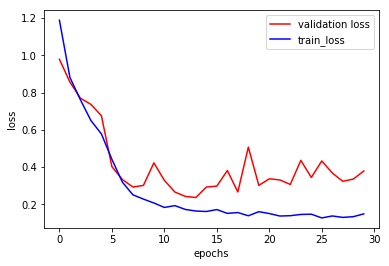

Test loss 0.37837991104009505
Test accuracy 0.8998982015609094


In [105]:
#plotting train and test loss
val_loss=history.history['val_loss']
train_loss=history.history['loss']
plot_dynamic(epochs,val_loss,train_loss)
print('Test loss',score[0])
print('Test accuracy',score[1])

## Model 2: 128 hidden layers

In [41]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(128, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.4))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               70656     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 71,430
Trainable params: 71,430
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [43]:
# Training the model
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 52s 7ms/step - loss: 1.2749 - acc: 0.4230 - val_loss: 1.0800 - val_acc: 0.5158
Epoch 2/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.8672 - acc: 0.6001 - val_loss: 0.7878 - val_acc: 0.5758
Epoch 3/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.7140 - acc: 0.6926 - val_loss: 0.6480 - val_acc: 0.7469
Epoch 4/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.4559 - acc: 0.8307 - val_loss: 0.5047 - val_acc: 0.8293
Epoch 5/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.3152 - acc: 0.8893 - val_loss: 0.5031 - val_acc: 0.8466
Epoch 6/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.2271 - acc: 0.9242 - val_loss: 0.2746 - val_acc: 0.9016
Epoch 7/30
7352/7352 [==============================] - 51s 7ms/step - loss: 0.2024 - acc: 0.9279 - val_loss: 0.3616 - val_acc: 0.8945
Epoch 8

In [46]:
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 517        0        20        0                   0   
SITTING                  0      384       105        0                   0   
STANDING                 0       85       447        0                   0   
WALKING                  0        9         1      443                  19   
WALKING_DOWNSTAIRS       0        0         0        0                 420   
WALKING_UPSTAIRS         0        2         6        2                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                           24  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 460  


In [47]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 3s 1ms/step


In [48]:
score

[0.3682935545481282, 0.9063454360366474]

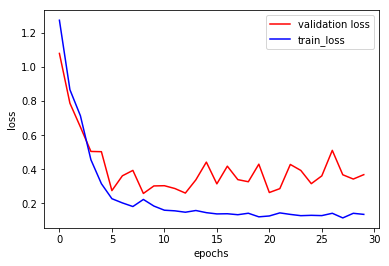

Test loss 0.3682935545481282
Test accuracy 0.9063454360366474


In [51]:
#plotting train and test loss
val_loss=history.history['val_loss']
train_loss=history.history['loss']
plot_dynamic(epochs,val_loss,train_loss)
print('Test loss',score[0])
print('Test accuracy',score[1])

## Model 3: 256 hidden layer

In [52]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(256, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.4))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 256)               272384    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1542      
Total params: 273,926
Trainable params: 273,926
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [54]:
# Training the model
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 118s 16ms/step - loss: 1.2889 - acc: 0.4414 - val_loss: 1.4322 - val_acc: 0.3258
Epoch 2/30
7352/7352 [==============================] - 117s 16ms/step - loss: 1.1250 - acc: 0.5076 - val_loss: 1.0207 - val_acc: 0.5575
Epoch 3/30
7352/7352 [==============================] - 117s 16ms/step - loss: 0.7406 - acc: 0.6786 - val_loss: 0.7181 - val_acc: 0.6746
Epoch 4/30
7352/7352 [==============================] - 118s 16ms/step - loss: 0.4854 - acc: 0.8214 - val_loss: 0.5527 - val_acc: 0.7998
Epoch 5/30
7352/7352 [==============================] - 117s 16ms/step - loss: 0.3035 - acc: 0.8954 - val_loss: 0.3706 - val_acc: 0.8968
Epoch 6/30
7352/7352 [==============================] - 117s 16ms/step - loss: 0.2416 - acc: 0.9149 - val_loss: 0.3905 - val_acc: 0.8843
Epoch 7/30
7352/7352 [==============================] - 117s 16ms/step - loss: 0.1964 - acc: 0.9245 - val_loss: 0.3006 - val_acc: 

In [55]:
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 517        0        20        0                   0   
SITTING                  0      340       149        0                   0   
STANDING                 0       45       487        0                   0   
WALKING                  0        0         0      465                  29   
WALKING_DOWNSTAIRS       0        0         0        1                 416   
WALKING_UPSTAIRS         0        2        19        8                   2   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                 3  
WALKING_UPSTAIRS                 440  


In [56]:
score = model.evaluate(X_test, Y_test)
score

2947/2947 [==============================] - 9s 3ms/step


[0.4706485792249341, 0.9043094672548354]

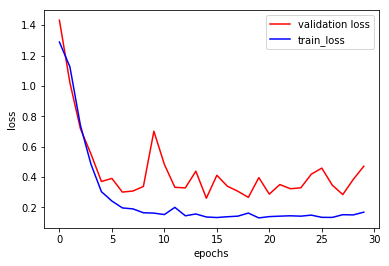

Test loss 0.4706485792249341
Test accuracy 0.9043094672548354


In [57]:
#plotting train and test loss
val_loss=history.history['val_loss']
train_loss=history.history['loss']
plot_dynamic(epochs,val_loss,train_loss)
print('Test loss',score[0])
print('Test accuracy',score[1])

### Model 4 : 2 LSTM Layers

##### Finding the best dropout rate

In [28]:
scores=[]
for i in (0.3,0.5,0.7):
    model = Sequential()
    # Configuring the parameters
    model.add(LSTM(128,return_sequences=True, input_shape=(timesteps, input_dim)))
    # Adding a dropout layer
    model.add(Dropout(i))
    model.add(LSTM(256))
    model.add(Dropout(i))
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(n_classes, activation='sigmoid'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    
    history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)
    score = model.evaluate(X_test, Y_test)
    scores.append(score)
    print("The score for model with dropout of {} is {}".format(i,score))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 128)          70656     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1542      
Total params: 466,438
Trainable params: 466,438
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 223s 30ms/step - loss: 1.0058 - 

In [40]:
drop=[0.3,0.5,0.7]
count=0
for i in drop:
    
    print("The accuracy for model with dropout rate of {} is {}".format(i,scores[count][1]) )
    count+=1

The accuracy for model with dropout rate of 0.3 is 0.8829317950458093
The accuracy for model with dropout rate of 0.5 is 0.9009161859518154
The accuracy for model with dropout rate of 0.7 is 0.9039701391245334


In [60]:
#model with dropout rate of 0.7
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(256, return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.7))
model.add(LSTM(128))
model.add(Dropout(0.7))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128, 256)          272384    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 256)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
Total params: 470,278
Trainable params: 470,278
Non-trainable params: 0
_________________________________________________________________


In [61]:
history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 253s 34ms/step - loss: 1.3047 - acc: 0.4320 - val_loss: 0.9711 - val_acc: 0.5901
Epoch 2/30
7352/7352 [==============================] - 243s 33ms/step - loss: 0.8754 - acc: 0.6017 - val_loss: 0.7570 - val_acc: 0.6186
Epoch 3/30
7352/7352 [==============================] - 241s 33ms/step - loss: 0.7189 - acc: 0.6730 - val_loss: 0.9287 - val_acc: 0.6502
Epoch 4/30
7352/7352 [==============================] - 262s 36ms/step - loss: 0.4576 - acc: 0.8409 - val_loss: 0.6709 - val_acc: 0.7920
Epoch 5/30
7352/7352 [==============================] - 281s 38ms/step - loss: 0.4332 - acc: 0.8619 - val_loss: 0.6226 - val_acc: 0.8280
Epoch 6/30
7352/7352 [==============================] - 276s 38ms/step - loss: 0.3160 - acc: 0.9033 - val_loss: 0.4457 - val_acc: 0.8761
Epoch 7/30
7352/7352 [==============================] - 246s 34ms/step - loss: 0.2249 - acc: 0.9260 - val_loss: 0.4182 - val_acc: 

In [63]:
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  1      430        58        0                   0   
STANDING                 0      120       412        0                   0   
WALKING                  0        0         0      471                  21   
WALKING_DOWNSTAIRS       0        0         0        1                 418   
WALKING_UPSTAIRS         0        1         0        5                   6   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 459  


In [64]:
score = model.evaluate(X_test, Y_test)
score

2947/2947 [==============================] - 22s 8ms/step


[0.3385070033687646, 0.9253478113335596]

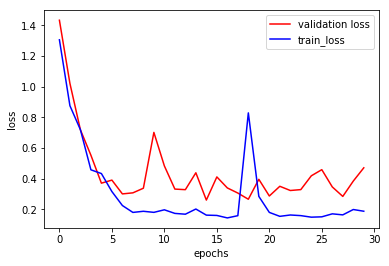

Test loss 0.3385070033687646
Test accuracy 0.9253478113335596


In [65]:
train_loss=history.history['loss']
plot_dynamic(epochs,val_loss,train_loss)
print('Test loss',score[0])
print('Test accuracy',score[1])

## Conclusion:
    

Objective:
To build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

1. This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.
<br>
2. We have features gained from accelerometer and gyroscope. we have raw features and also 561 engineered features by experts.
   We use raw features for deeplearning and 561 features for machine learning algorithms.
3. We perform EDA on the dataset to know about the distribution of the data, get more insights about the data and apply tsne to know if the data is seperable.
<br>
4. We apply machine learning algorithms like RBF SVM, Logistic Regression,Decision Tree, Random Forest for 561 features and compare .
<br>
5. We use accuracy and log loss as performance metric and find that SVM,SVC and LR gives the maximum accuracy of 96%.
<br>
6. We then apply deep learning algorithms (LSTM) on initial features and get an accuracy of 88%.
<br>
7. We try to improve the score by hyperparameter tuning the LSTM model.
<br>

In [67]:
from prettytable import PrettyTable

x=PrettyTable()

x.field_names=['Algorithm','LSTM-Layers','Hidden Layers','Dropout','Accuracy']
x.add_row(["LSTM","1",64,0.5, 0.899])
x.add_row(["LSTM","1",128,0.4, 0.906])
x.add_row(["LSTM","1",256,0.4, 0.904])
x.add_row(["LSTM","2",'256,128',0.7, 0.9253])
          

print(x)

+-----------+-------------+---------------+---------+----------+
| Algorithm | LSTM-Layers | Hidden Layers | Dropout | Accuracy |
+-----------+-------------+---------------+---------+----------+
|    LSTM   |      1      |       64      |   0.5   |  0.899   |
|    LSTM   |      1      |      128      |   0.4   |  0.906   |
|    LSTM   |      1      |      256      |   0.4   |  0.904   |
|    LSTM   |      2      |    256,128    |   0.7   |  0.9253  |
+-----------+-------------+---------------+---------+----------+
